# <center>Prevendo Series Temporais com NeuralProphet</center>
## <center>Gileno Alves Santa Cruz Filho</center>

<center><img src='https://media.licdn.com/dms/image/C5603AQG0COwre01Org/profile-displayphoto-shrink_400_400/0/1652799269938?e=1694044800&v=beta&t=8QZ0POPHkOjc-MJhufp9VAK9wU2eaE2Dw7foH5g5CAQ' alt='Gileno Alves Santa Cruz Filho' /></center>
<h2><center>Desenvolvedor Sênior / Cientista de Dados</center></h2>
<h2><center>Stefanini / Colgate</center></h2>

<center>
<img src="https://img.freepik.com/free-photo/top-view-office-desk-with-growth-chart-hands_23-2148780613.jpg?w=996&t=st=1688758217~exp=1688758817~hmac=3a1e35fda2d6dd734f584296d47da815372f202cc571103b7d1577bab5cf6b49" />
Fonte: <a href='https://www.freepik.com/free-photo/top-view-office-desk-with-growth-chart-hands_11383332.htm#query=forecast&position=1&from_view=search&track=sph'>https://www.freepik.com/free-photo/top-view-office-desk-with-growth-chart-hands_11383332.htm#query=forecast&position=1&from_view=search&track=sph</a>
</center>

## Previsões (Forecasts)

- Não são usadas apenas para prever o tempo (Alô APAC)
- O tempo é o principal fator
- Mas existem outros fatores (Multivariate Time Series)
- Será que o futuro seguirá uma tendência?
- Existe Sazonalidade?

# <center>Aplicações</center>

<center>
    <img src="https://img.freepik.com/free-vector/internet-business-income-earning-money-online-cartoon-character-working-with-laptop-programmer-freelancer-earning-investment-financial-success-concept-illustration_335657-2068.jpg?w=740&t=st=1688779525~exp=1688780125~hmac=fe830f705360ccf04fab56bef4ace8d5a65c2fd8afa7ba89ea39f881d23d388d" />
    Fonte: <a href="https://www.freepik.com/free-vector/internet-business-income-earning-money-online-cartoon-character-working-with-laptop-programmer-freelancer-earning-investment-financial-success-concept-illustration_11668503.htm#query=sales%20forecast&position=24&from_view=search&track=ais">https://www.freepik.com/free-vector/internet-business-income-earning-money-online-cartoon-character-working-with-laptop-programmer-freelancer-earning-investment-financial-success-concept-illustration_11668503.htm#query=sales%20forecast&position=24&from_view=search&track=ais</a>
</center>

<center>
<img src="https://img.freepik.com/free-photo/closeup-golden-bitcoins-dark-reflective-surface-histogram-decreasing-crypto_1268-19910.jpg?w=996&t=st=1688779821~exp=1688780421~hmac=f5d6152048577dd329dd78ea19753d401b3a5eb76a8d3317cb2e73838a331cd5" />
    Fonte: <a href="https://www.freepik.com/free-photo/closeup-golden-bitcoins-dark-reflective-surface-histogram-decreasing-crypto_24366861.htm#query=criptomoedas&position=1&from_view=search&track=sph">https://www.freepik.com/free-photo/closeup-golden-bitcoins-dark-reflective-surface-histogram-decreasing-crypto_24366861.htm#query=criptomoedas&position=1&from_view=search&track=sph</a>
</center>

## Desafio na Colgate (Predição de Vendas Indiretas)

- Multinacional (seu nome diz sobre si)
- Diferentes canais de vendas indiretas (Distribuidores, atacado...)
- O registro das vendas diárias tem grandes picos (ex: final do mês)
- Parceiros podem mudar de "patamar" (quedas bruscas nas vendas)

## Alguns Objetivos

- Quanto cada canal irá vender nos próximos 3 meses?
- Quanto cada parceiro irá vender nos próximos 3 meses?
- Qual a previsão de venda da próxima semana?

# NeuralProphet

- Biblioteca inspirada em Prophet (Facebook) e AR-Net
- Baseada em Redes Neurais
- Boa usabilidade
- Documentação em https://neuralprophet.com/contents.html

# <center>Vamos codar</center>
<center>
    <img src="https://img.freepik.com/free-vector/hand-coding-concept-illustration_114360-8193.jpg?w=740&t=st=1688780674~exp=1688781274~hmac=d62fe211d30178ccc866b336255c26da291bd3f5b6a0ab22d21c07e93493f311" />
    Fonte: <a href="https://www.freepik.com/free-vector/hand-coding-concept-illustration_21864184.htm#query=code&position=18&from_view=search&track=sph">https://www.freepik.com/free-vector/hand-coding-concept-illustration_21864184.htm#query=code&position=18&from_view=search&track=sph</a>
</center>

# Carregando as libs

In [1]:
import logging, sys
logging.disable(sys.maxsize)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
import pandas as pd
import datetime as dt

from dateutil.relativedelta import relativedelta

from neuralprophet import NeuralProphet, save

pd.set_option('display.float_format', lambda x: '%.2f' % x)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# Store Sales - Time Series Forecasting 

- Kaggle: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

# Conjuntos

- Dados de treinamento (train.csv)
- Dados de teste (test.csv)
- Dados das lojas (stores.csv)
- Dados do preço diário do Petróleo (oil.csv)
- Dados de Feriados (holidays_events.csv)
- Dados de transações da Loja (transactions.csv)

In [2]:
# Treino
df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


In [3]:
# Teste
df_test = pd.read_csv('data/test.csv')
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [4]:
# Feriados
df_holidays = pd.read_csv('data/holidays_events.csv')
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
# Lojas
df_stores = pd.read_csv('data/stores.csv')
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# Explorando o treinamento

- Por hora não vamos explorar o conjunto `oil` nem o `transactions`

In [9]:
# dados de treino
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d')
print("Início:", df_train['date'].min())
print("Término:", df_train['date'].max())

Início: 2013-01-01 00:00:00
Término: 2017-08-15 00:00:00


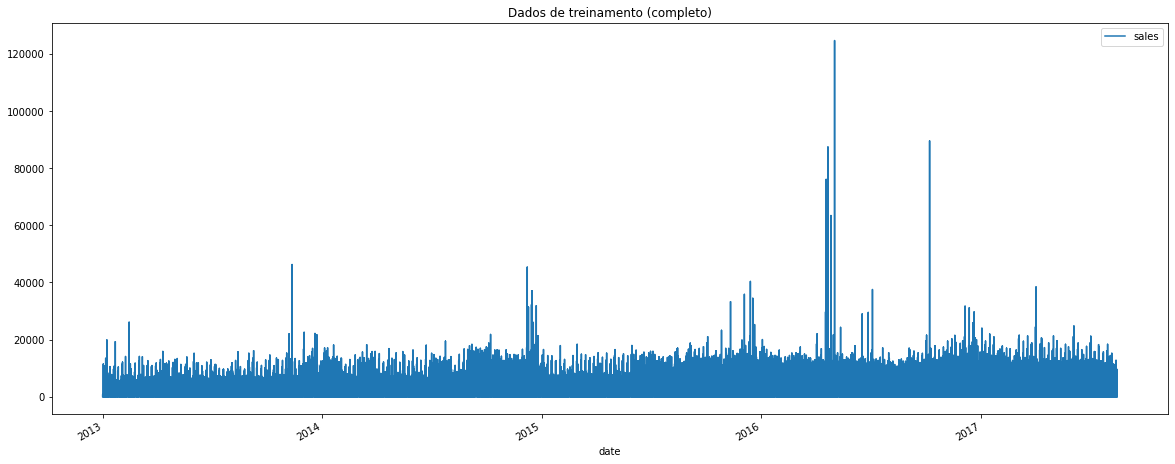

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
df_train.plot.line(x='date', y='sales', ax=axes)
plt.title('Dados de treinamento (completo)')
plt.show()

# Cuidado com a escala

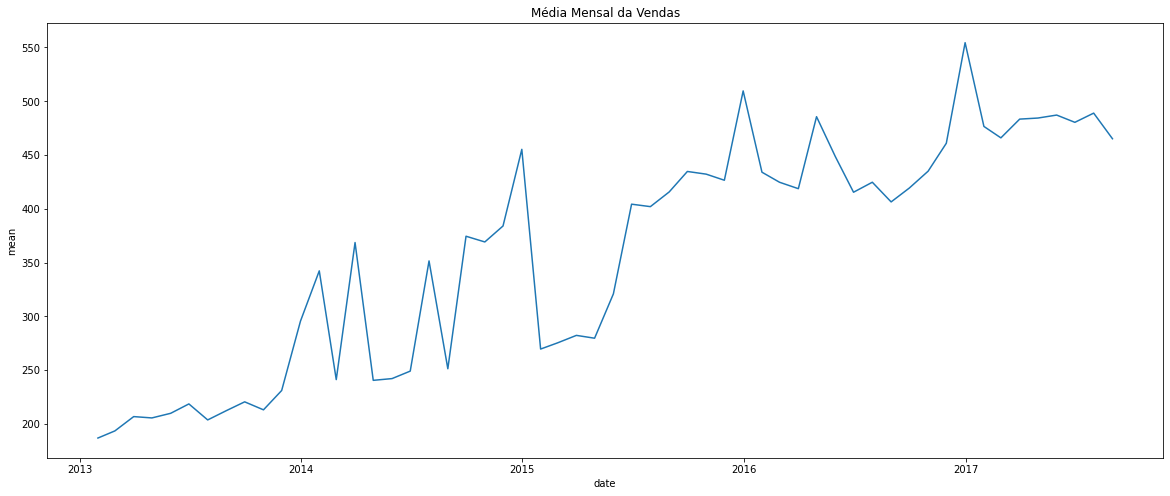

In [11]:
# para ver a chaves de agrupamento checar o pd.date_range
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
df_train_grouped = df_train.groupby([pd.Grouper(key='date', freq='M')]).agg(mean=('sales', 'mean'))
df_train_grouped = df_train_grouped.reset_index()
sns.lineplot(x=df_train_grouped['date'], y=df_train_grouped['mean'], ax=axes)
plt.title('Média Mensal da Vendas')
plt.show()

# Vamos trabalhar apenas com uma loja

In [12]:
df_train_store = df_train[df_train['store_nbr'] == 1]
df_train_store['date'] = pd.to_datetime(df_train_store['date'], format='%Y-%m-%d')
df_train_store.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


# Gerar um modelo básico para separar os dados

In [13]:
model = NeuralProphet(
    yearly_seasonality=True,
    daily_seasonality=True,
    weekly_seasonality=True,
    ar_layers=[16, 16, 16, 16],
    learning_rate=0.01,
    loss_func='MAE',
)

In [14]:
df_model = df_train_store[['date', 'sales']]
df_model.columns = ['ds', 'y']
df_model = df_model.groupby('ds').sum().reset_index()
df_train, df_val = model.split_df(df_model, valid_p=0.2)
print("Total dados:", len(df_model))
print("Total treino:", len(df_train))
print("Total validação:", len(df_val))

Total dados: 1684
Total treino: 1348
Total validação: 336


# Feriados / Eventos

In [15]:
store_name = df_stores[df_stores['store_nbr'] == 1].iloc[0]['city']
store_name

'Quito'

In [16]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'], format='%Y-%m-%d')
df_holidays_store = df_holidays[
    (df_holidays['locale_name'] == store_name) & (df_holidays['transferred'] == False)
]
df_holidays_store.head()

,date,type,locale,locale_name,description,transferred
28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
29,2012-12-06,Holiday,Local,Quito,Fundacion de Quito,False
81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
82,2013-12-06,Holiday,Local,Quito,Fundacion de Quito,False
146,2014-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


# Vamos gerar os eventos

In [17]:
events = pd.DataFrame(
    {
        "event": "city_holidays",
        "ds": df_holidays['date'],
    }
)
events.head()

,event,ds
0,city_holidays,2012-03-02
1,city_holidays,2012-04-01
2,city_holidays,2012-04-12
3,city_holidays,2012-04-14
4,city_holidays,2012-04-21


# Vamos treinar o modelo

In [18]:
model = model.add_events("city_holidays")
history_df = model.create_df_with_events(df_train, events)

In [19]:
metrics_train = model.fit(history_df, freq="D", progress="bar")
metrics_train

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,27099.09,29958.82,1.52,0.00,0
1,27026.01,29826.53,1.52,0.00,1
2,26282.16,29056.17,1.48,0.00,2
3,25623.52,28449.18,1.44,0.00,3
4,24896.48,27600.40,1.40,0.00,4
...,...,...,...,...,...
172,1107.84,1606.80,0.06,0.00,172
173,1113.44,1599.68,0.06,0.00,173
174,1096.81,1573.41,0.06,0.00,174
175,1104.57,1591.66,0.06,0.00,175


# Vamo validar o modelo

In [20]:
history_df_val = model.create_df_with_events(df_val, events)
forecast = model.predict(history_df_val)
model.plot(forecast)

Predicting: 43it [00:00, ?it/s]

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '0bcd636a-87df-4e03-9289-b89985d2a2ad',
              'x': array([datetime.datetime(2016, 9, 13, 0, 0),
                          datetime.datetime(2016, 9, 14, 0, 0),
                          datetime.datetime(2016, 9, 15, 0, 0), ...,
                          datetime.datetime(2017, 8, 13, 0, 0),
                          datetime.datetime(2017, 8, 14, 0, 0),
                          datetime.datetime(2017, 8, 15, 0, 0)], dtype=object),
              'y': array([10720.99707031, 12929.31054688, 10320.02734375, ...,  5174.67236328,
                          10096.30175781,  9778.1328125 ])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
    